In [34]:
#MAKE_volcano_plot_Rscript
#
#Designed to make volcano plot for every omics data (proteomics, metabolomics, autoantibody) 
#and every comparison (negVSpos, cVSpos, cVSneg, cVSra)
#
#Note: [1] P-value threshold for autoantibody : 0.05
#      [2] P-value threshold for autoantibody : 0.01

library(ggplot2)
library(ggrepel)

[1] "#####"
[1] "proteomics"
[1] "cVSra"
[1] 15
[1] 25
[1] "#####"


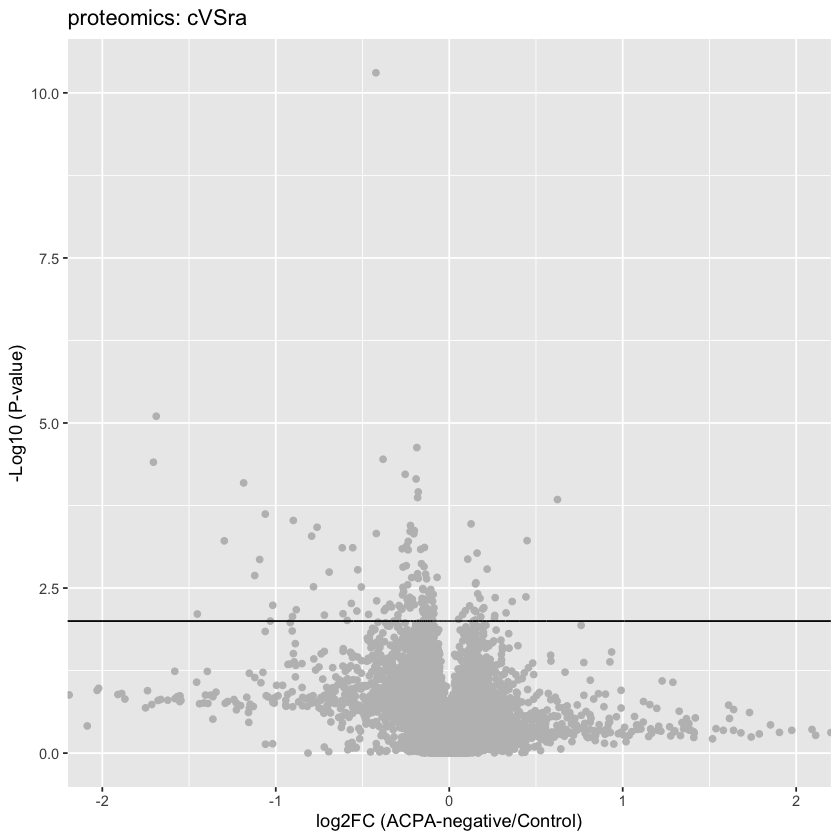

In [65]:
# omics_list = c("autoantibody","metabolomics","proteomics")
omics_list = c("proteomics")
# condition_list = c("negVSpos","cVSpos","cVSneg","cVSra")
condition_list = c("cVSra")

for (omics in omics_list){
    
    for (condition in condition_list){
        
        data_file = paste("../../../analysis/statistics/linear_model/differential_abundance/", 
                          omics, ".", condition,".padj.v2.tsv", sep="")
        input_df = read.csv(data_file, sep="\t", header=TRUE, row.names=1)
        
        x_axis <- input_df$fc_case_control
        y_axis <- -log10(input_df$pval)
        cohenD <- input_df$cohenD

        gene_list <- rownames(input_df)
        
        #make dataframe for volcano plot
        #row names = gene list
        df <- do.call(rbind, Map(data.frame, 'log2FC'=x_axis, 'pval'=y_axis, 'cohenD'=cohenD))
        rownames(df) <- gene_list
        df$genes <- row.names(df)
        

        #Thresholds for data points color
        #pvalue 0.01 = 2 (-log10 pval)
        sig_subset <- subset(df, pval > 2)
        
        if (omics == "autoantibody"){ #since we decided to change the threshold of autoantibody profiles
            sig_subset <- subset(df, pval > 1.30103)
        }

        #filter out by Cohen's D
        sig_subset <- subset(sig_subset, cohenD > 0.5)
        
        #assign color of the dot (feature)
        find_feature <- subset(sig_subset, genes == "NAMPT") 

        
        #Debug
        print ('#####')
        print (omics)
        print (condition)
        print (nrow(sig_red_subset))
        print (nrow(sig_blue_subset))
        print ('#####')
        #Debug
        
        
        figure_title = paste(omics,": ", condition, sep="")
        
        check_plot <- ggplot(df, aes(x=log2FC, y=pval))+ coord_cartesian(xlim=c(-2,2))+ 
        geom_point(colour="grey") + 
        geom_point(data = find_feature, colour='red') +
        geom_line(aes(y=2))+
        geom_text_repel(data=find_feature, aes(log2FC, pval, label=genes), colour='red', size=2) +
        ylab("-Log10 (P-value)") + xlab(xaxis_label) +
        ggtitle(figure_title)
        print (check_plot)
    }
}